In [33]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import os
import io
import json
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
import zipfile
import itertools
from collections import  Counter

# 1. Loading the data

**Question 1 : Load**



*   Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
*   Please describe the structure of the data. Number of records and fields in each record?


*   Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.






In [ ]:
#uploading the given zip file
from google.colab import files
uploaded = files.upload()

Saving transactions.zip to transactions.zip


In [ ]:
# Load the zipfile
zf = zipfile.ZipFile('transactions.zip', 'r')
zipinfos = zf.infolist()
df = zf.open(zipinfos[0].filename).read().splitlines()
df = [json.loads(rows) for rows in df]
df = pd.DataFrame(df) #converting into pandas dataframe

In [ ]:
# extracting the zip file
#import zipfile
#import io
#zf = zipfile.ZipFile(io.BytesIO(uploaded['transactions.zip']), "r")
#zf.extractall()

In [ ]:
#
#dc = list()
#cols = None
#with open('transactions.txt', 'r') as file:
 #   lines = file.readlines()
  #  for line in tqdm(lines):
   #   dict1 = json.loads(line)
    #  dict1 = dict(sorted(dict1.items()))
     # if cols is None: cols = list(dict1.keys())
      #values = list(dict1.values())
      #for i in range(len(values)):
       # if isinstance(values[i], str) and len(values[i]) == 0:
        #  values[i] = np.nan
       # elif isinstance(values[i], str):
        #  values[i] = values[i].strip()
         # dc.append(values)
#df = pd.DataFrame(dc, columns=cols)
#df = pd.read_json('transactions.txt', lines=True)
#df = pd.read_json('transactions.txt', lines=True)
#df = pd.read_json('transactions.txt', lines=True)
#df = pd.read_json('transactions.txt', lines=True)
#df.replace('', np.nan, inplace=True)
#print(df.isnull().sum())
#pd.to_pickle(df, '/content/pickdataset', protocol=4)##


100%|██████████| 786363/786363 [00:41<00:00, 18930.00it/s]


accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

Reading the head elements from df which gives first few records details.

In [ ]:
#df = pd.read_pickle('/content/pickdataset')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [ ]:
print("Number of rows, which represents total number of records =",df.shape[0])

Number of rows, which represents total number of records = 786363


In [ ]:
print("Number of columns, which represents the number of fields in each record = ",df.shape[1])

Number of columns, which represents the number of fields in each record =  29


In [ ]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
df.replace('', np.nan, inplace=True) # replacing the empty cell values with nan.

Additional statistics on data

In [ ]:
# Checking for NULL values
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             



*   We can observe that for some columns, all the records are NULL values. So we can eliminate those since they don't have any significance with the data.
*   All the records for echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd are NULL, so we can drop these columns from the table.

In [ ]:
data = df.copy() #copying the original dataset for data modeling purposes before dropping it

In [ ]:
#dropping columns which has all the entities as NULL values i.e. have no significance on other data.
data.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd'], axis = 1, inplace = True)

In [31]:
data = data.reset_index(drop=True)
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


6 columns are dropped

Min and Max values are only relevant in creditLimit, availableMoney, transactionAmount and currentBalance.

In [ ]:
print("Minimum creditLimit = ", df['creditLimit'].min())
print("Maximum creditLimit = ", df['creditLimit'].max())
print("Minimum availableMoney = ", df['availableMoney'].min())
print("Maximum availableMoney = ", df['availableMoney'].max())
print("Minimum Transaction amount = ", df['transactionAmount'].min())
print("Maximum Transaction amount = ", df['transactionAmount'].max())
print("Minimum currentBalance = ", df['currentBalance'].min())
print("Maximum currentBalance = ", df['currentBalance'].max())

Minimum creditLimit =  250.0
Maximum creditLimit =  50000.0
Minimum availableMoney =  -1005.63
Maximum availableMoney =  50000.0
Minimum Transaction amount =  0.0
Maximum Transaction amount =  2011.54
Minimum currentBalance =  0.0
Maximum currentBalance =  47498.81


# 2. Plots

**Question 2: Plot**


*   Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
*   Report any structure you find and any hypotheses you have about that structure.



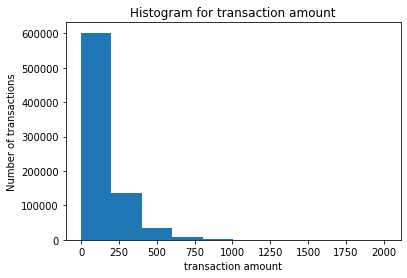

In [ ]:
plt.hist(df['transactionAmount'])
plt.xlabel('transaction amount')
plt.ylabel('Number of transactions')
plt.title('Histogram for transaction amount')
plt.show()


*   Many transactions are in 0 to 250 range, if we can reduce the x scale, we can get a better understanding on the transaction amount histogram.





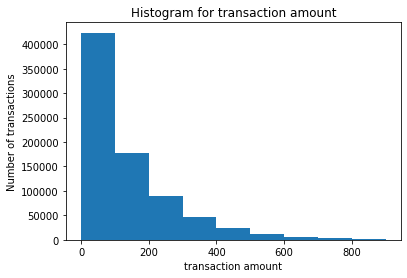

In [ ]:
# Histogram for transaction amount
plt.hist(df['transactionAmount'] [df['transactionAmount']<900],bins=[0,100,200,300,400,500,600,700,800,900])
plt.xlabel('transaction amount')
plt.ylabel('Number of transactions')
plt.title('Histogram for transaction amount')
plt.show()

**Transaction amount hypothesis**



*  The histogram is skewed right.  
*  Most of the transactions are in the range from 0 to 200. Above that range, very few transactions happened. Almost half of the transactions are below 100. Seems like transaction amounts are quite low.


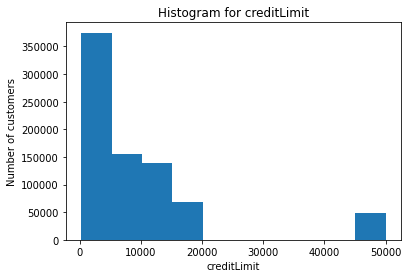

In [ ]:
# Histogram for credit limit
plt.hist(df['creditLimit']) 
plt.xlabel('creditLimit')
plt.ylabel('Number of customers')
plt.title('Histogram for creditLimit')
plt.show()

**Credit Limit hypothesis**

Looks like some data is random. There maybe a chance of outliers since having credit limit of around 50000 is more exceptional. And those many customers having credit limit in this high range seems to be not so practical. 

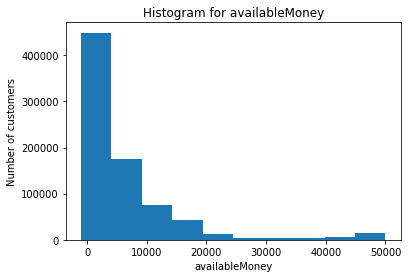

In [ ]:
# Histogram for available money
plt.hist(df['availableMoney']) 
plt.xlabel('availableMoney')
plt.ylabel('Number of customers')
plt.title('Histogram for availableMoney')
plt.show()

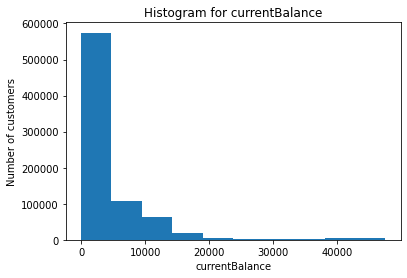

In [ ]:
# Histogram for currentBalance
plt.hist(df['currentBalance']) 
plt.xlabel('currentBalance')
plt.ylabel('Number of customers')
plt.title('Histogram for currentBalance')
plt.show()

**Available money and current balance**

Both available money and current balance looks right skewed.

 **IsFraud**

Let's look into Fraud values

Text(0, 0.5, 'count number')

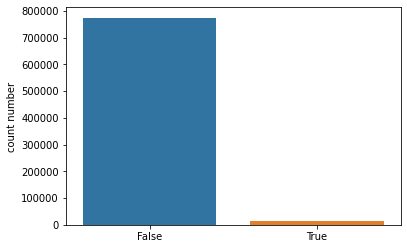

In [ ]:
#Barplot for Fraud or not
sn.barplot(x=[0,1], y=df['isFraud'].value_counts())
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('count number')



*   That looks terrible! The data is very much unbalanced.
*   Techniques like under sampling or SMOTE can be done to balance this data.



# 3.Duplicate Transactions

**Question 3: Data Wrangling - Duplicate Transactions**


*   Can you programmatically identify reversed and multi-swipe transactions?

*   What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)


*  Did you find anything interesting about either kind of transaction?






## a. Reversed transactions



*  In reversed transactions, purchase is followed by a reversal. We can identity this using the following points.
   *   accountNumber, customerId, merchantName,transactionAmount will be the same in both purchase and reverse transactions.
  *    And the transaction DateTime of purchase  comes before the reversal.  


**To determine the reversed transactions:**


1.   We will first identity the duplicate rows by checking the accountNumber, customerId, merchantName, transactionAmount for purachase and reverse transactions. 
2.   I created two different datasets to store purchase and reverse transactions from the duplicate dataset. Then I merged these two datasets to create a new dataset which contains accountNumber, customerId, merchantName, transactionAmount of both purchase and reserve transaction datasets.
3. After that I selected the rows which has purchase transaction DateTime earlier than reverse transaction DateTime.


In [54]:
#selecting the duplicate rows in the dataset with respect to accountNumber, customerId, merchantName,transactionAmount
duplicated = df[df.duplicated(['accountNumber','customerId','merchantName', 'transactionAmount'])]

#creating new datasets for purchase and reversal
purchase_trans = duplicated[duplicated.transactionType == 'PURCHASE']
reversal_trans = duplicated[duplicated.transactionType == 'REVERSAL']

#joining the two datasets based on accountNumber, customerId, merchantName,transactionAmount
join_trans = pd.merge(purchase_trans,reversal_trans, on=['accountNumber','customerId','merchantName', 'transactionAmount'], how='inner')
join_trans.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV_x,enteredCVV_x,cardLast4Digits_x,transactionType_x,echoBuffer_x,currentBalance_x,merchantCity_x,merchantState_x,merchantZip_x,cardPresent_x,posOnPremises_x,recurringAuthInd_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,cardCVV_y,enteredCVV_y,cardLast4Digits_y,transactionType_y,echoBuffer_y,currentBalance_y,merchantCity_y,merchantState_y,merchantZip_y,cardPresent_y,posOnPremises_y,recurringAuthInd_y,expirationDateKeyInMatch_y,isFraud_y
0,389428961,389428961,7500.0,6418.95,2016-04-23 11:12:59,70.81,walmart.com,US,US,02,08,online_retail,2027-06-01,2012-06-04,2012-06-04,296,296,5254,PURCHASE,NaN,1081.05,NaN,NaN,NaN,False,NaN,NaN,False,False,7500.0,6357.91,2016-05-21 22:52:54,US,US,02,08,online_retail,2027-06-01,2012-06-04,2012-06-04,296,296,5254,REVERSAL,NaN,1142.09,NaN,NaN,NaN,False,NaN,NaN,False,False
1,934061435,934061435,5000.0,1076.20,2016-12-26 15:55:31,120.47,apple.com,US,US,09,01,online_retail,2030-08-01,2014-12-31,2016-07-24,985,985,394,PURCHASE,NaN,3923.80,NaN,NaN,NaN,False,NaN,NaN,False,False,5000.0,692.03,2016-12-30 23:16:52,US,US,09,01,online_retail,2030-08-01,2014-12-31,2016-07-24,985,985,394,REVERSAL,NaN,4307.97,NaN,NaN,NaN,False,NaN,NaN,False,False
2,893468720,893468720,7500.0,2760.24,2016-07-16 22:26:44,218.82,34th BBQ #538716,US,US,05,01,food,2021-11-01,2015-02-06,2015-02-06,537,537,7784,PURCHASE,NaN,4739.76,NaN,NaN,NaN,True,NaN,NaN,False,False,7500.0,2511.89,2016-07-25 23:09:47,US,US,05,01,food,2021-11-01,2015-02-06,2015-02-06,537,537,7784,REVERSAL,NaN,4988.11,NaN,NaN,NaN,True,NaN,NaN,False,False
3,646126950,646126950,7500.0,6689.67,2016-02-17 16:54:28,49.48,Walgreens #655270,US,US,05,01,health,2028-07-01,2013-12-31,2013-12-31,383,383,1668,PURCHASE,NaN,810.33,NaN,NaN,NaN,False,NaN,NaN,False,False,7500.0,5742.26,2016-02-29 07:36:50,US,US,05,01,health,2028-07-01,2013-12-31,2013-12-31,383,383,1668,REVERSAL,NaN,1757.74,NaN,NaN,NaN,False,NaN,NaN,False,False
4,646126950,646126950,7500.0,6640.19,2016-02-17 16:56:37,49.48,Walgreens #655270,US,US,05,01,health,2028-07-01,2013-12-31,2013-12-31,383,383,1668,PURCHASE,NaN,859.81,NaN,NaN,NaN,False,NaN,NaN,False,False,7500.0,5742.26,2016-02-29 07:36:50,US,US,05,01,health,2028-07-01,2013-12-31,2013-12-31,383,383,1668,REVERSAL,NaN,1757.74,NaN,NaN,NaN,False,NaN,NaN,False,False




*   In the above table, _x represents data from purchase transactions and _y represents data from reversal transactions.


In [50]:
#selecting the rows for which the purchase transaction DateTime is earlier than reverse transaction DateTime.
reversed_trans = join_trans[join_trans.transactionDateTime_x < join_trans.transactionDateTime_y]
reversed_trans.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV_x,enteredCVV_x,cardLast4Digits_x,transactionType_x,echoBuffer_x,currentBalance_x,merchantCity_x,merchantState_x,merchantZip_x,cardPresent_x,posOnPremises_x,recurringAuthInd_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,cardCVV_y,enteredCVV_y,cardLast4Digits_y,transactionType_y,echoBuffer_y,currentBalance_y,merchantCity_y,merchantState_y,merchantZip_y,cardPresent_y,posOnPremises_y,recurringAuthInd_y,expirationDateKeyInMatch_y,isFraud_y
0,574788567,574788567,2500.0,2416.11,2016-05-24 01:35:33,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,PURCHASE,NaN,83.89,NaN,NaN,NaN,True,NaN,NaN,False,False,2500.0,2200.98,2016-05-24 01:38:03,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
1,924729945,924729945,50000.0,50000.00,2016-10-04 04:20:04,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,50000.0,49831.43,2016-10-19 14:01:45,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
2,984504651,984504651,50000.0,49138.85,2016-01-06 04:08:06,83.64,1st Sandwitch Bar #801388,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,861.15,NaN,NaN,NaN,True,NaN,NaN,False,False,50000.0,38090.70,2016-02-04 00:14:42,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,11909.30,NaN,NaN,NaN,True,NaN,NaN,False,False
3,984504651,984504651,50000.0,46818.15,2016-01-16 09:52:30,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,3181.85,NaN,NaN,NaN,False,NaN,NaN,False,False,50000.0,46367.41,2016-01-16 09:53:15,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
4,984504651,984504651,50000.0,46341.05,2016-01-17 08:13:08,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,3658.95,NaN,NaN,NaN,True,NaN,NaN,False,False,50000.0,41909.30,2016-01-25 20:39:15,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [52]:
#The above table contains many columns, let's see the columns which are important to identify the reversed transactions.
reversed_trans[['accountNumber','customerId','merchantName', 'transactionAmount','transactionDateTime_x',
                'transactionDateTime_y','transactionType_x','transactionType_y']].head()

,accountNumber,customerId,merchantName,transactionAmount,transactionDateTime_x,transactionDateTime_y,transactionType_x,transactionType_y
0,574788567,574788567,Convenient Tire,215.13,2016-05-24 01:35:33,2016-05-24 01:38:03,PURCHASE,REVERSAL
1,924729945,924729945,discount.com,168.57,2016-10-04 04:20:04,2016-10-19 14:01:45,PURCHASE,REVERSAL
2,984504651,984504651,1st Sandwitch Bar #801388,83.64,2016-01-06 04:08:06,2016-02-04 00:14:42,PURCHASE,REVERSAL
3,984504651,984504651,Planet Fitness #849960,450.74,2016-01-16 09:52:30,2016-01-16 09:53:15,PURCHASE,REVERSAL
4,984504651,984504651,AMC #724446,81.73,2016-01-17 08:13:08,2016-01-25 20:39:15,PURCHASE,REVERSAL


## b. Multi-swipe transactions



*   In Multi-swipe transactions, a vendor accidentally charges a customer's card multiple times within a short time span. We can identify this using following conditions.

 *   If a vendor accidentally charges multiple times, then the transaction amount will be the same. So, this can be one of our criteria.
 *   Also, the transactions will happen in a short span, maybe within 10 minutes.





**To determine Multi-swipe transactions:**

    

1.   We will first identity the duplicate rows by checking the accountNumber, customerId, merchantName, transactionAmount,transactionType for purachase  transactions (identifying the rows with transaction type as purchase).
2.   I created a function to find the time span and identify the rows for which the transaction span is less than 10 minutes(my assumption).



In [76]:
#selecting the duplicate rows in the dataset with respect to accountNumber, customerId, merchantName,transactionAmount, transactionType
duplicated = data[data.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionType'],keep= False)]

#creating new dataset for purchase
purchase_trans_ms = duplicated[duplicated.transactionType == 'PURCHASE']
purchase_trans_ms.sort_values(['accountNumber', 'customerId', 'merchantName', 'transactionDateTime'])
purchase_trans_ms.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
11,830329091,830329091,5000.0,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,False,False,False
12,830329091,830329091,5000.0,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,40.75,False,False,False
13,830329091,830329091,5000.0,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,81.50,False,False,False


In [90]:
#creating a span function
def span(d):
    d['time_span'] = d["transactionDateTime"].diff(1).dt.total_seconds() / 60
    return d
# Grouping the dataset
purchase_multi = purchase_trans_ms.groupby(['accountNumber', 'customerId', 'merchantName', 'transactionAmount']).apply(span)

#Selecting the rows with rime span less than 10 minutes
multi_swipe_trans = purchase_multi[purchase_multi.time_span < 10]
multi_swipe_trans.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,time_span
263,984504651,984504651,50000.0,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,0.266667
264,984504651,984504651,50000.0,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,2.200000
281,984504651,984504651,50000.0,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,01,health,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,0.733333
339,984504651,984504651,50000.0,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,08,health,2030-02-01,2015-07-27,2016-03-26,640,640,8332,PURCHASE,33496.51,False,False,False,0.633333
413,984504651,984504651,50000.0,7302.32,2016-05-07 07:32:54,23.82,Golds Gym #846582,US,US,09,01,health,2030-12-01,2015-07-27,2016-05-05,640,640,8332,PURCHASE,42697.68,True,False,False,2.866667


In [91]:
#The above table contains many columns, let's see the columns which are important to identify the multi-swipe transactions.
multi_swipe_trans[['accountNumber','customerId','merchantName', 'transactionAmount','transactionDateTime','transactionType']].head()

,accountNumber,customerId,merchantName,transactionAmount,transactionDateTime,transactionType
263,984504651,984504651,AMC #706324,118.52,2016-03-12 06:34:29,PURCHASE
264,984504651,984504651,AMC #706324,118.52,2016-03-12 06:36:41,PURCHASE
281,984504651,984504651,Planet Fitness #692929,26.71,2016-03-18 13:57:04,PURCHASE
339,984504651,984504651,WSC #994275,43.21,2016-04-08 22:21:11,PURCHASE
413,984504651,984504651,Golds Gym #846582,23.82,2016-05-07 07:32:54,PURCHASE




*   **Total number of transactions and total dollar amount for reversed transactions**




In [92]:
print("Number of reversed transactions = ",reversed_trans.shape[0])
print("Total dollar amount for reversed transactions = ",reversed_trans.transactionAmount.sum())

Number of reversed transactions =  17999
Total dollar amount for reversed transactions =  2701311.87


*   **Total number of transactions and total dollar amount for multi-swipe transactions**

In [93]:
print("Number of multi-swipe transactions = ",multi_swipe_trans.shape[0])
print("Total dollar amount for multi swipe transactions = ",multi_swipe_trans.transactionAmount.sum())

Number of multi-swipe transactions =  7450
Total dollar amount for multi swipe transactions =  1103132.25




*   **Observations from the above reversed and multi swipe transactions**


